In [1]:
import math
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
l2w = '/home/angela/m3/tutorials/tmp/S2A_MSI_2020_03_21_16_05_11_T17PKK_L2W.nc'

In [4]:
nc = Dataset(l2w)
ds = list(nc.variables.keys())

#['lon', 'lat', 'l2_flags', 'spm_nechad2016'] 
dataset = ds[3]
print('reading dataset: ', dataset)
data = nc.variables[dataset][:]
print(data.shape)
print(data.dtype)

print('\n')
print(f"min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

reading dataset:  spm_nechad2016
(2946, 2718)
float32


min: -3.7036550045013428, max: 57.71449661254883, mean: 2.331603527069092


In [5]:
values = data.flatten()
print(f"data size: {data.shape}, \ntotal elements     : {len(values)}")
values = values[~np.isnan(values)]
print(f"elements not masked: {len(values)}")
values.shape
b = values < 0
print(f"elements < 0       :   {len(values[b])}")

data size: (2946, 2718), 
total elements     : 8007228
elements not masked: 1449154
elements < 0       :   25649


In [6]:
def load_colormap(filename):
    """Load a colormap defined in a text file
    filename is the .txt file name located in the
    data/path, not the full path.
    list_available_colormaps() lists the available color tables
    """
    try:
        color_map_values = pd.read_csv(filename).to_numpy()/255.
        colormap = ListedColormap(color_map_values)
    except IOError:
        print(f"Cannot load colormap {filename}")
        raise
    colormap.set_bad("gray") # color of missing pixels
    colormap.set_under("white") # color of background, necessary if you want to use
    # this colormap directly with hp.mollview(m, cmap=colormap)
    # healpy tutorial see:https://healpy.readthedocs.io/en/latest/tutorial.html
    return colormap

In [7]:
cmp = load_colormap('data/planck_parchment_rgb.csv')

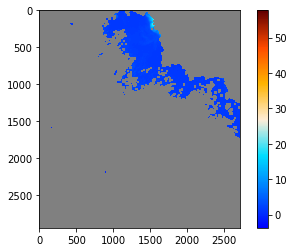

In [8]:
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
fig = plt.imshow(data)
fig.set_cmap(cmp)
plt.colorbar()

# Display the results.
plt.show()

In [9]:
plt.imsave("test.png", data, cmap=cmp, format='png')

In [12]:
nc.close()